In [1]:
# Import required modules
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.distributions.multivariate_normal import MultivariateNormal
from torch.distributions.mixture_same_family import MixtureSameFamily
from torch.distributions.normal import Normal
from torch.distributions.categorical import Categorical
from torch.distributions.independent import Independent
from lightning_data_modules.SyntheticDataset import SyntheticDataModule
from lightning_modules.BaseSdeGenerativeModel import BaseSdeGenerativeModel
from lightning_modules.ConservativeSdeGenerativeModel import ConservativeSdeGenerativeModel
from models.fcn import FCN
from models.utils import get_score_fn
from utils import compute_divergence, compute_grad, compute_curl

In [3]:
from configs.jan.circles.fokker_planck.fokker_planck_circles import get_config
config = get_config()
data_m = SyntheticDataModule(config)
data_m.setup()
circles = data_m.dataset

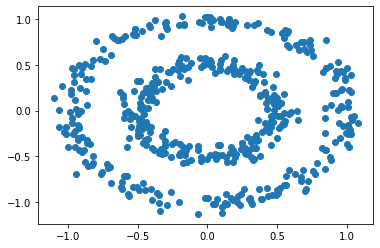

In [4]:
plt.scatter(circles.data[:500,0], circles.data[:500,1])


In [22]:
d=1.2
n=100
dx = 2*d/n
c=[0,0]
x = np.linspace(-d + c[0], d + c[0], n)
y = np.linspace(-d + c[1], d + c[1], n)
# Meshgrid
X,Y = np.meshgrid(x,y)
XYpairs = np.stack([ X.reshape(-1), Y.reshape(-1) ], axis=1)
XYpairs_tensor = torch.from_numpy(XYpairs) + 1e-10 # for numerical stability
t=1.
t = torch.tensor([t]*len(XYpairs_tensor))

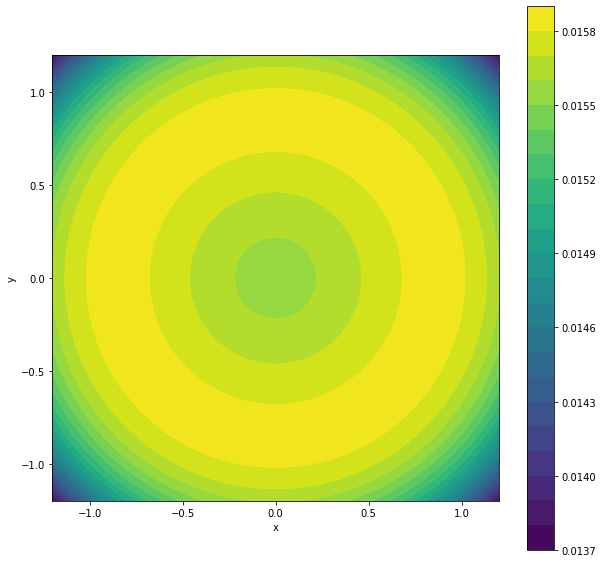

In [23]:
plt.figure(figsize=(10, 10))
Z=data_m.dataset.log_prob(XYpairs_tensor, t).detach().numpy().reshape(n,n)
Z=np.exp(Z)
plt.contourf(X, Y, Z, levels =20)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal')
plt.show()